In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


Look for any clustering of patients

In [3]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', index_col=0)

In [23]:
tissue_df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_tissues.csv', index_col=0)
ancestry_df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/clinical/ancestory.csv', index_col=0)

In [24]:
tissue_df.head()

,Tissue
Sample,
TCGA-3H-AB3K,MESO
TCGA-3H-AB3L,MESO
TCGA-3H-AB3M,MESO
TCGA-3H-AB3O,MESO
TCGA-3H-AB3S,MESO


In [31]:
def get_tissue(x):
    try:
        return list(tissue_df.ix[x])[0]
    except:
        return ''
def get_ancestry(x):
    try:
        return list(ancestry_df.ix[x])[0]
    except:
        return ''

In [8]:
df = pd.concat([classI.transpose(), classII.transpose()]).transpose()

In [9]:
df_matrix = df.as_matrix()

In [10]:
model = TSNE(n_components=2, random_state=0)
TSNEs = model.fit_transform(df_matrix)

In [16]:
tsne_df = pd.DataFrame(TSNEs)
tsne_df.columns = ['tsne1', 'tsne2']
tsne_df['sample'] = df.index

In [32]:
tsne_df['tissue'] = tsne_df['sample'].apply(get_tissue)
tsne_df['ancestry'] = tsne_df['sample'].apply(get_ancestry)

7


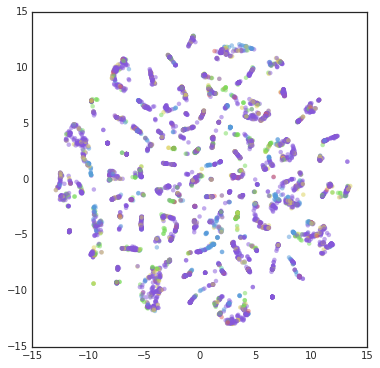

In [38]:
# ancestry
palette = sns.color_palette("hls", len(set(tsne_df.ancestry)))
print len(palette)
colors = {}
for i, ancestry in enumerate(set(tsne_df.ancestry)):
    colors[ancestry] = palette[i]
tsne_df['ancestry_color'] = tsne_df.ancestry.map(colors)
plt.figure(figsize=(6,6))
plt.scatter(tsne_df.tsne1, tsne_df.tsne2, c=tsne_df.ancestry_color, lw = 0, alpha=0.5, s=20) # c=tsne_df.color,

29


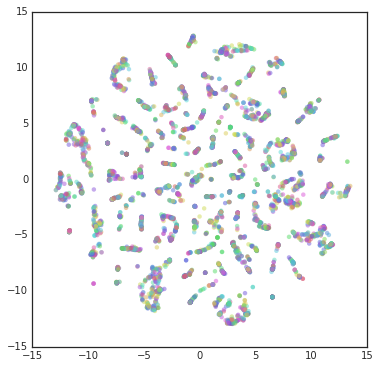

In [43]:
# tissue
palette = sns.color_palette("hls", len(set(tsne_df.tissue)))
print len(palette)
colors = {}
for i, tissue in enumerate(set(tsne_df.tissue)):
    colors[tissue] = palette[i]
tsne_df['tissue_color'] = tsne_df.tissue.map(colors)
plt.figure(figsize=(6,6))
plt.scatter(tsne_df.tsne1, tsne_df.tsne2, c=tsne_df.tissue_color, lw = 0, alpha=0.5, s=20)

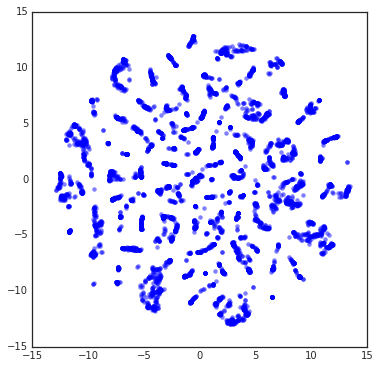

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(tsne_df.tsne1, tsne_df.tsne2, lw = 0, alpha=0.5, s=20) # c=tsne_df.color,

In [18]:
pca = PCA(n_components=2)
PCAs = pca.fit_transform(df_matrix)

In [19]:
pca_df = pd.DataFrame(PCAs)
pca_df.columns = ['comp1', 'comp2']
pca_df['sample'] = df.index

In [40]:
pca_df['tissue'] = pca_df['sample'].apply(get_tissue)
pca_df['ancestry'] = pca_df['sample'].apply(get_ancestry)

In [41]:
pca_df['ancestry_color'] = pca_df.ancestry.map(colors)
pca_df['tissue_color'] = pca_df.tissue.map(colors)

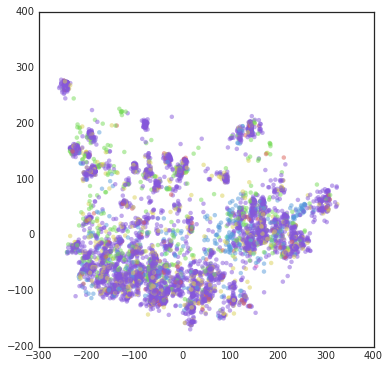

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(pca_df.comp1, pca_df.comp2, c=tsne_df.ancestry_color, lw = 0, alpha=0.5, s=20) # c=tsne_df.color,

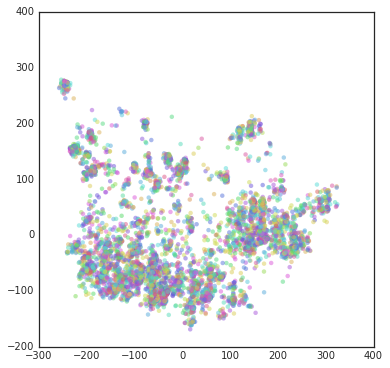

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(pca_df.comp1, pca_df.comp2, c=tsne_df.tissue_color, lw = 0, alpha=0.5, s=20) # c=tsne_df.color,